# **Workshop VIII** <br/> *Regression Tree, Random Forest, Bagging and Boosting*

This notebook aims to provide a practical overview of regression trees, random forests, as well as bagging and boosting. After this workshop, the student should be able to know:
* how to apply regression trees, random forests, or a bagging / boosting approach
* when to apply regression trees, random forests, or a bagging / boosting approach

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes

/var/folders/25/82ztpk21087b258r7gs0n3m00000gn/T/ipykernel_18113/1613067009.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. Data Preprocessing and Exploration

### a. Load your dataset

In [2]:
df = pd.read_csv('data/clean_tree_data.csv')
data_n = 2000
df = df.sample(data_n, random_state=31415)
df.head()

,Unnamed: 0,Boomhoogteklasseactueel,growth_ground,diameter_categories,tree_height_fixed,tree_height_random,diameter,tree_admin,tree_municipality,age,species,species_group,tree_treatment,Naam_buurt,Naam_wijk,parked_cars_in_neighbourhood
16058,17467,f. 18 tot 24 m.,Gazon,"0,3 tot 0,5 m.",21.0,23.629957,0.40,Recreatieschap Noord-Holland,Gemeente Amsterdam,59.0,Quercus robur cv.,Quercus,Boom niet vrij uitgroeiend,Osdorper Binnenpolder,Geuzenveld,856
8176,8176,e. 15 tot 18 m.,Vaste planten,"0,2 tot 0,3 m.",16.5,17.762241,0.25,R&E_VOR_Bomen,Gemeente Amsterdam,32.0,Ulmus minor 'Sarniensis',Ulmus,Boom niet vrij uitgroeiend,Bellamybuurt-Zuid,Bellamybuurt,318
4343,4343,d. 12 tot 15 m.,Gazon,"0,2 tot 0,3 m.",13.5,14.223425,0.25,R&E_VOR_Bomen,Gemeente Amsterdam,41.0,Tilia europaea,Tilia,Boom niet vrij uitgroeiend,Amstel III deel A/B-Noord,Amstel III/Bullewijk,16
16059,17468,f. 18 tot 24 m.,Gazon,"0,3 tot 0,5 m.",21.0,20.579012,0.40,Recreatieschap Noord-Holland,Gemeente Amsterdam,59.0,Fraxinus excelsior cv.,Fraxinus,Boom niet vrij uitgroeiend,Osdorper Binnenpolder,Geuzenveld,856
9412,9412,f. 18 tot 24 m.,Bloemrijk gras,"0,5 tot 1 m.",21.0,20.064187,0.75,R&E_VOR_Bomen,Gemeente Amsterdam,54.0,Quercus palustris,Quercus,Boom niet vrij uitgroeiend,Drieburg,Betondorp,397


### b. [OPTIONAL] Preprocess the data

Depending on your dataset, you can perform different techniques of data preprocessing such as dropping NaN values, create dummy variables or standardize your data.

In [3]:
# data is already preprocessed in municipal_data.ipynb

df.columns

Index(['Unnamed: 0', 'Boomhoogteklasseactueel', 'growth_ground',
       'diameter_categories', 'tree_height_fixed', 'tree_height_random',
       'diameter', 'tree_admin', 'tree_municipality', 'age', 'species',
       'species_group', 'tree_treatment', 'Naam_buurt', 'Naam_wijk',
       'parked_cars_in_neighbourhood'],
      dtype='object')

### c. Split the dataset into features (independent variables) and target variable (dependent variable) 

In [4]:
features = ['diameter', 'age', 'parked_cars_in_neighbourhood']
X = df[features] # TODO: Take features
y = df['tree_height_fixed'] # TODO: Take variable

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2000, 3), y shape: (2000,)


### d. Split the dataset into training and testing sets

In [5]:
test_size = 0.25 #  Define the percentage of the test size after train-test split
random_state = 31415 #  Define random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1500, 3), y_train shape: (1500,)
X_test shape: (500, 3), y_test shape: (500,)


## 2. Regression Tree

In this exercise, we will use sklearn.tree.DecisionTreeRegressor.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Define and train the model

In [6]:
#  Define an Regression Tree object using DecisionTreeRegression 
regression_tree =  DecisionTreeRegressor(max_depth=3) # you can experiment with any hyperparameters

#  Fit the model
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Make predictions and evaluate the model

In [7]:
# Make predictions
y_pred_cart = regression_tree.predict(X_test)

In [8]:
# Evaluate the model using MSE
import math
mse = mean_squared_error(y_test, y_pred_cart)
print(f'Mean Squared Error: {mse}')
print(math.sqrt(mse))
# That's similar to what my linear regression models were giving

Mean Squared Error: 15.1252376301424
3.8891178472942167


### Examples of visualization techniques for qualitative interpretations and analysis

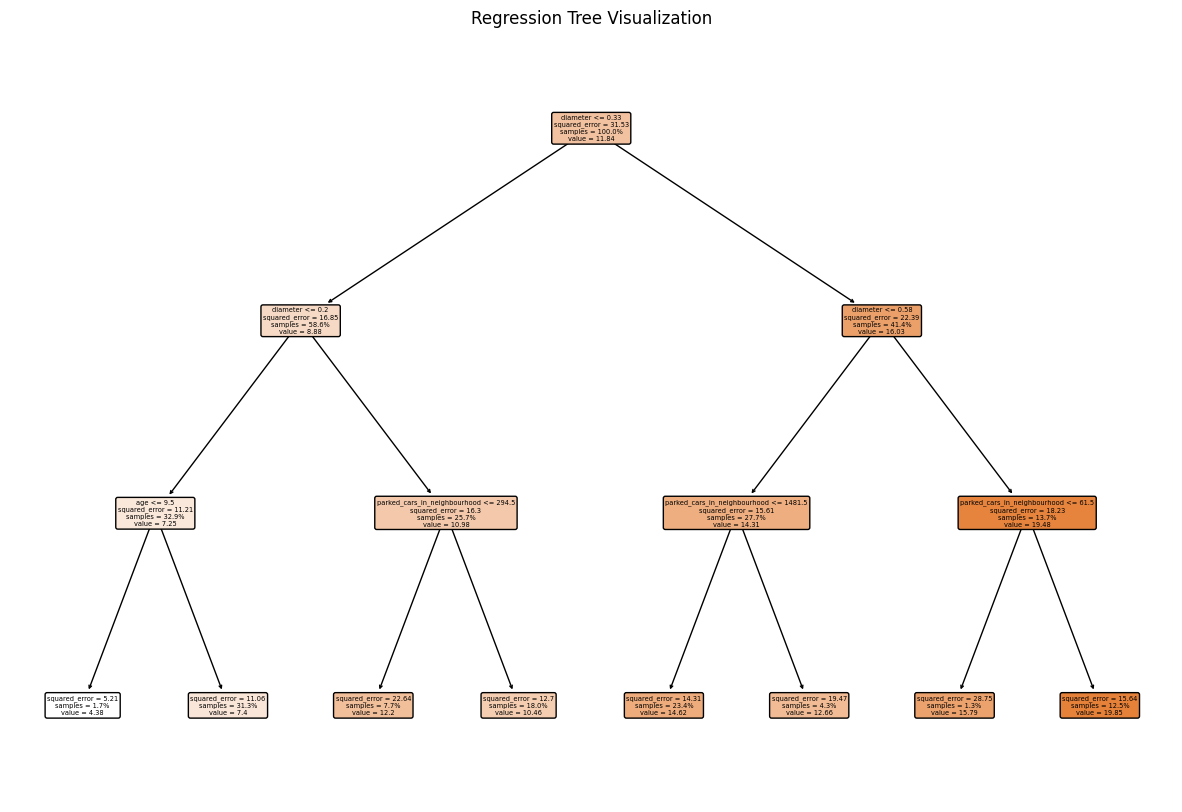

In [9]:
# Visualize the regression tree using plot_tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2)
plt.title("Regression Tree Visualization")
plt.show()

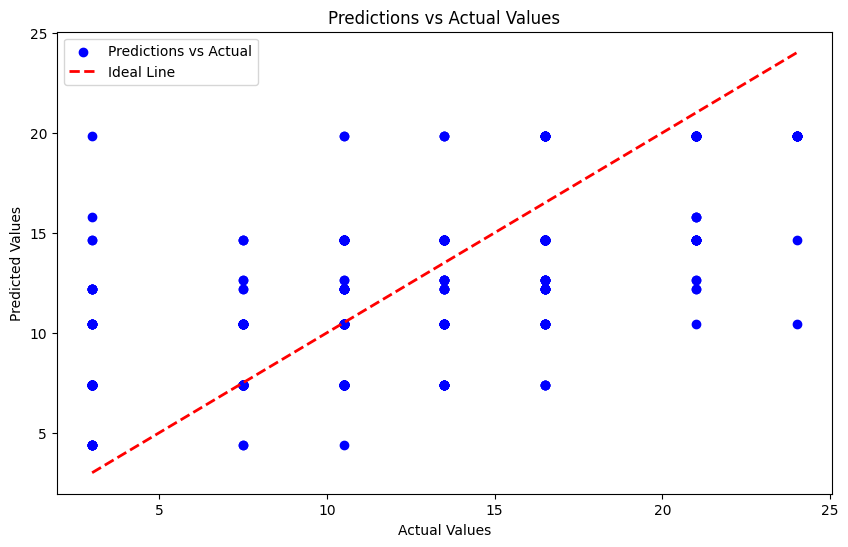

In [10]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cart, color='blue', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

As with my linear regression models, the nature of the data gives an interesting looking graph. We only have specific values for the height of trees - 3, 7.5, etc. because the dataset only contained values such as "between 6 and 9" for the height. So we have these vertical lines representing that.

## 3. Random Forest

In this exercise, we will use the class sklearn.ensemble.RandomForestRegressor.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Define and train the model

In [11]:
# Define an Random Forest object using RandomForestRegressor 
rf_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=31415)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=31415)

### Make predictions and evaluate the model

In [12]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [13]:
# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 14.055090486250396


## 4. Understand the parameters of random forest

### Feature importantces

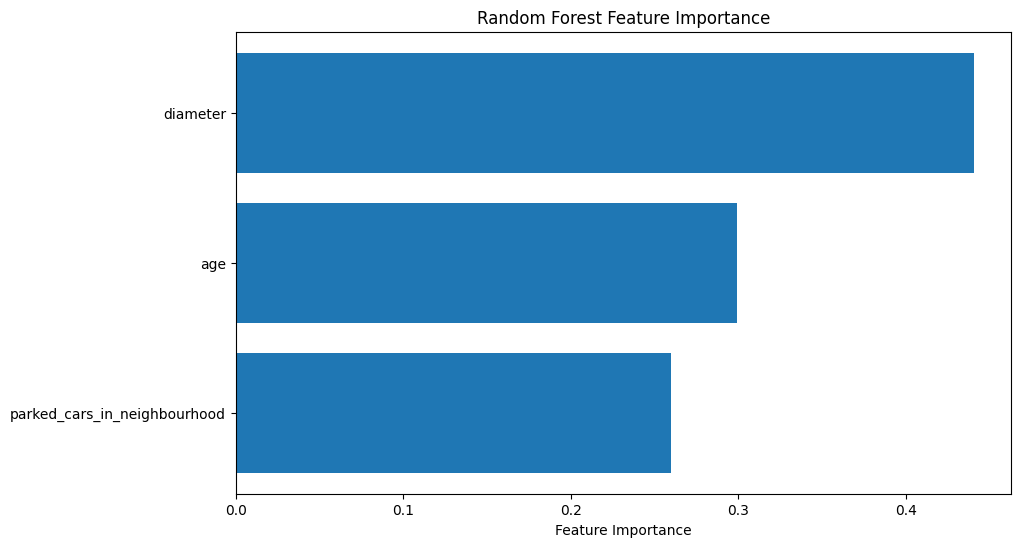

In [14]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

What does this figure mean? Which feature is the most important?

This figure shows the order of importance for each variable. They show by what % they contribute to the outcome variable. Diameter is shown to be the most important predictor of height.

#### Visualization

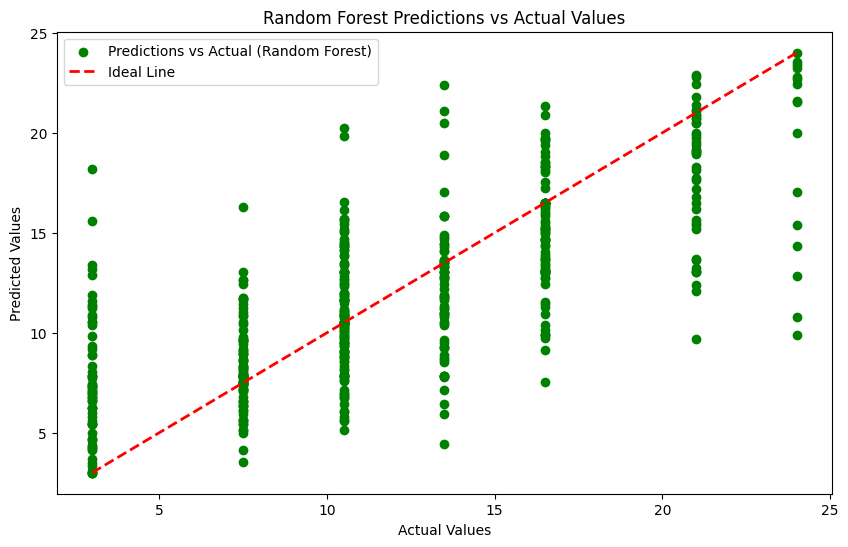

In [15]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

What if we use fewer or more estimators in random forest? Plot the curve to see how the MSE change for different value of n_estimators.

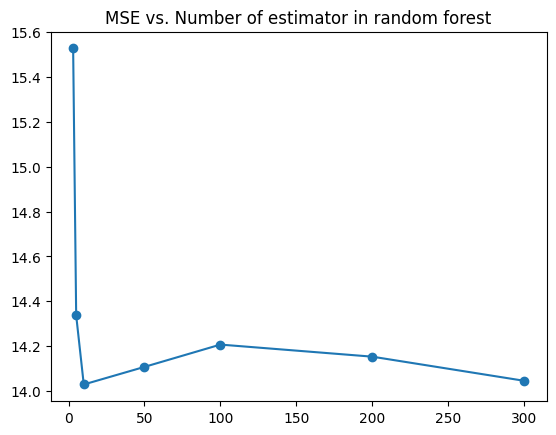

In [16]:
nList = [3,5,10,50,100,200,300]
mseList = []
for nEst in nList:
    # Define an Random Forest object using RandomForestRegressor 
    rf_model = RandomForestRegressor(n_estimators=nEst, max_features='sqrt', random_state=42)
    
    # Fit the model
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_nrf = rf_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_nrf)
    mseList.append(mse)

plt.plot(nList,mseList,"-o")
plt.title('MSE vs. Number of estimator in random forest')
plt.show()

In the following part, we are going to cover two fundamental ensemble learning techniques: **Bagging** and **Boosting**

## 5. Bagging - Training and Evaluating a Model of Your Choice
The function sklearn.ensemble.BaggingRegressor can be utilized to perform the bagging on your own algorithms.

Try to implement it in a way that the base estimator is the linear regression model.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [17]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Defining and fitting the model
bagging_model = BaggingRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f'Mean Squared Error (Bagging): {mse_bagging}')

Mean Squared Error (Bagging): 16.267142746606766


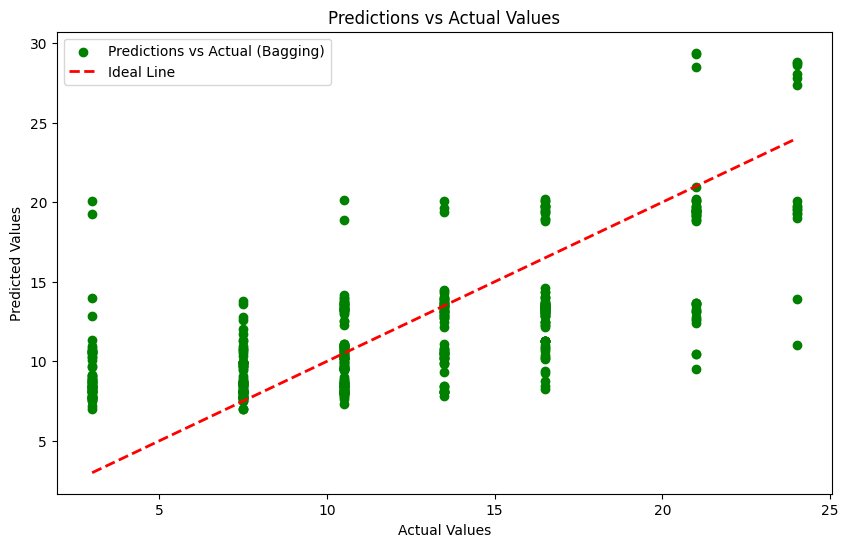

In [18]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual (Bagging)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 6. Boosting

#### AdaBoost Regressor

In [19]:
from sklearn.ensemble import AdaBoostRegressor

# Defining and fitting the model
adaboost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print(f'Mean Squared Error (AdaBoost): {mse_adaboost}')

Mean Squared Error (AdaBoost): 15.505496641400061


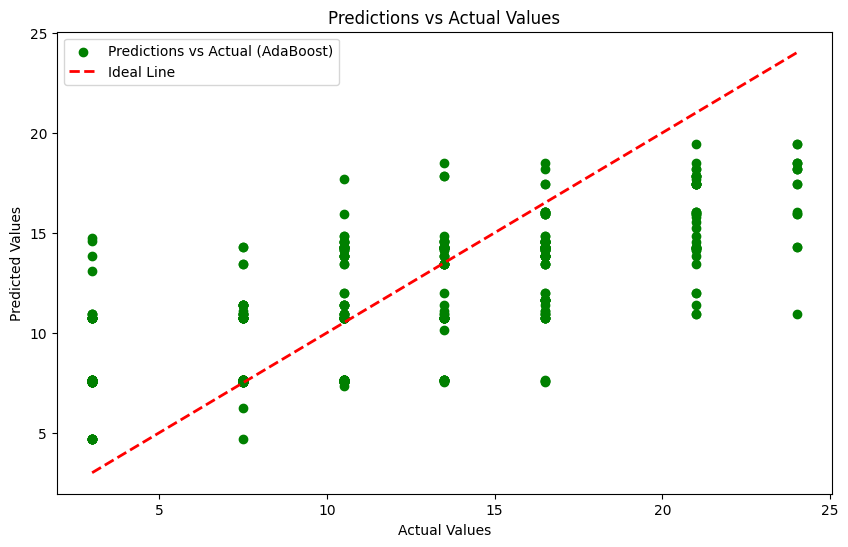

In [20]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### XGBoost Regressor

In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Defining and fitting the model
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

Mean Squared Error (XGBoost): 13.642027709770598


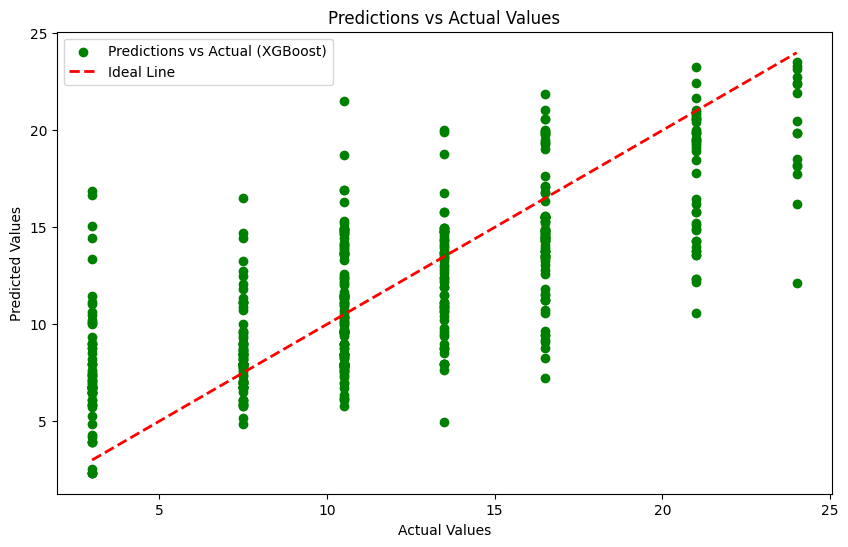

In [22]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 7. [OPTIONAL] Try XGBoost or random forest in classification task.
Do you think the above algorithms will work for classification tasks? Next, we try to use them for classification tasks.

For simplicity we discretize our y value into two classes.

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

# Reshape y_train to use with KBinsDiscretizer (it expects 2D array)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# Initialize the discretizer
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

# Fit the discretizer on the training data
discretizer.fit(y_test_reshaped)

# Now, transform y_train and y_test using the fitted discretizer
y_test_discrete = discretizer.transform(y_test_reshaped).astype(int)

/Users/Sari/Documents/Code/Semester 4 workbooks/venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Another way to split a continous variable by the median:

In [24]:
def discretize_data_median(y_test):
    # Calculate the median
    median = y_test.median()

    y_test_discrete = (y_test > median).astype(int)
    return y_test_discrete

# Usage:
y_test_distrete = discretize_data_median(y_test)

Try to use XGBoost to predict their classes.

In [25]:
from xgboost import XGBClassifier

# Defining and fitting the model
xgbcls_model = ...

# Fit the model
...

# Make predictions
y_pred_xgbcls = xgbcls_model.predict(X_test)

# Evaluate the model
accuracy_xgbcls = ...
print(f'Accuracy (XGBoost): {accuracy_xgbcls}')

AttributeError: 'ellipsis' object has no attribute 'predict'

Try to use RandomForest to predict their classes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define a Random Forest object using RandomForestClassifier
rfcls_model = ...

# Fit the model
...

# Make predictions
y_pred_rfcls = rfcls_model.predict(X_test)

# Evaluate the model
accuracy_rfcls = ...
print(f'Accuracy: {accuracy_rfcls}')

## 8. Interpretation of your results

Use this space to analyse the performance of your trained models throughout this workshop. Some examples of ideas include:
* discussing about the influence of some hyperparameters (e.g.: max_depth for Decision Tree, n_estimators for Random Forest, etc.)
* comparing the results you obtained using plots or tables


I'm not really sure how to interpret these models. They give similar results to my linear regression, i.e. height increases with diameter and age. They seem to give more importance to the number of parked cars than my linear regression algorithm, but this may be because I'm using overly simplified models.